# Heart Disease Prediction – Model Selection & Cross-Validation


# Projet : Prédiction des maladies cardiaques  
## Sélection du modèle & validation croisée

### Objectif
Les maladies cardiovasculaires sont l’une des principales causes de mortalité dans le monde.
L’objectif de ce projet est d’analyser des données cliniques de patients afin :

- d’identifier les variables les plus associées au risque de maladie cardiaque,
- de comparer plusieurs modèles de Machine Learning,
- et d’évaluer leurs performances dans un contexte médical,
  où les erreurs de prédiction peuvent avoir des conséquences importantes.



##  IMPORTATION DES LIBRAIRIES & DATASET

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

cols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach',
      'exang','oldpeak','slope','ca','thal','target']
df = pd.read_csv(
    r"C:\Users\hp\Downloads\heart+disease\processed.cleveland.data",
    sep=r"[,\s]+",
    header=None,
    names=cols,
    engine="python"
)

df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


##  Prétraitement des données
Nous vérifions :
- valeurs manquantes
- types de données
- distributions

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


## 4. Analyse exploratoire des données (EDA)
Nous visualisons la distribution de la cible, ainsi que les principales variables
pour comprendre le comportement du dataset.

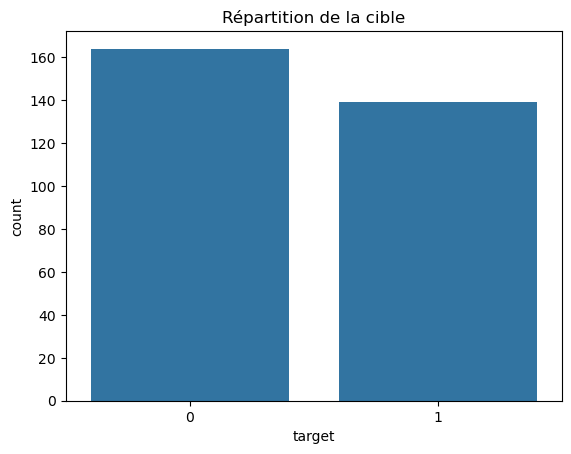

In [18]:
sns.countplot(x=df['target'])
plt.title('Répartition de la cible')
plt.show()

La variable cible est relativement bien équilibrée entre les patients atteints
et non atteints de maladie cardiaque.
Cette répartition limite les problèmes liés au déséquilibre de classes
et permet une évaluation plus fiable des performances des modèles
sans recourir à des techniques de rééchantillonnage.

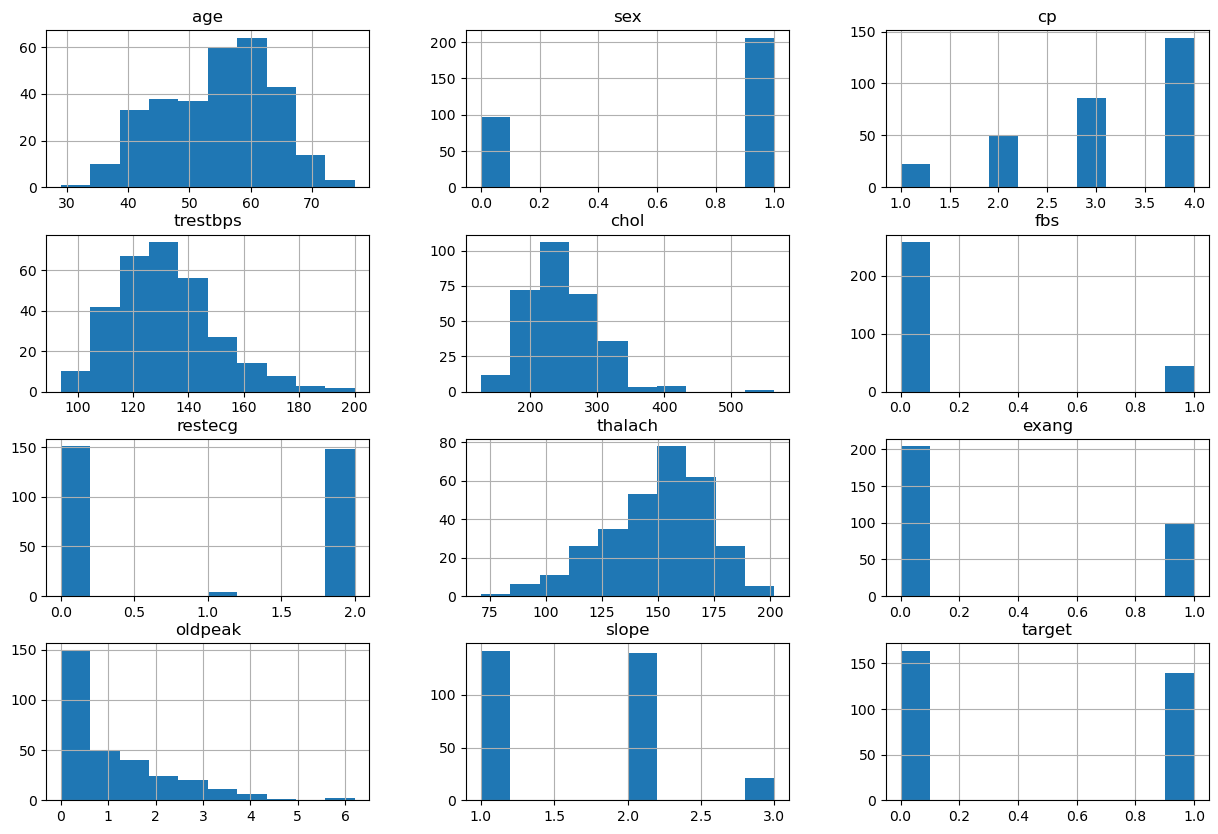

In [19]:
df.hist(figsize=(15,10))
plt.show()


Les distributions montrent que la majorité des patients ont un âge compris
entre 45 et 65 ans, ce qui correspond à une population à risque cardiovasculaire.

Certaines variables cliniques, comme la pression artérielle et le cholestérol,
présentent une dispersion importante, suggérant une forte variabilité
entre les patients.

La fréquence cardiaque maximale (`thalach`) présente une distribution
asymétrique, ce qui peut indiquer une relation avec l’état de santé cardiaque.

In [20]:

df.replace("?", np.nan, inplace=True)
df["ca"] = pd.to_numeric(df["ca"], errors="coerce")
df["thal"] = pd.to_numeric(df["thal"], errors="coerce")
df.dropna(inplace=True)

df["target"] = df["target"].astype(int)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


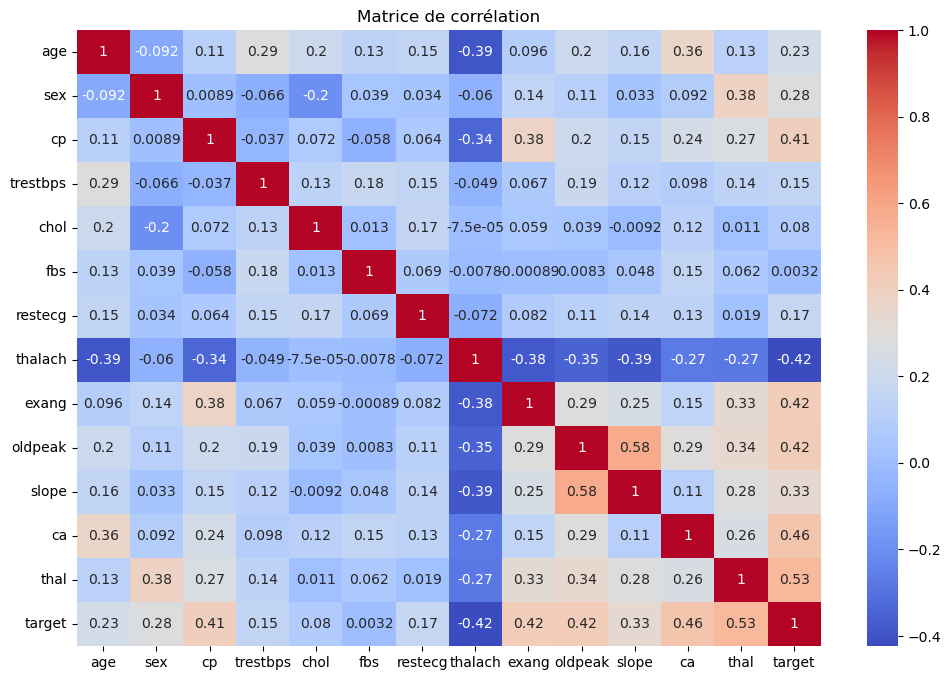

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()



La matrice de corrélation met en évidence plusieurs variables
fortement associées à la présence de maladie cardiaque (`target`).

Les variables `cp` (type de douleur thoracique),
`thal`, `ca` et `exang` présentent une corrélation positive significative
avec la cible, ce qui suggère leur importance dans l’estimation du risque.

À l’inverse, la variable `thalach` (fréquence cardiaque maximale)
est négativement corrélée avec la cible,
indiquant que les patients atteints de maladies cardiaques
atteignent généralement une fréquence maximale plus faible.

Certaines corrélations entre variables explicatives
(par exemple `oldpeak` et `slope`)
suggèrent la présence de multicolinéarité,
ce qui justifie l’utilisation de modèles robustes
comme la régression logistique régularisée ou les modèles ensemblistes.


## 5. Séparation des données + Normalisation

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 6. Entraînement de plusieurs modèles
### Choix des modèles

Plusieurs modèles ont été testés afin de comparer :

- des modèles simples et interprétables (Régression Logistique),
- des modèles basés sur la distance (KNN),
- des modèles plus complexes (SVM, Random Forest).

Ce choix permet d’évaluer le compromis entre performance et interprétabilité,
un aspect crucial dans le domaine médical.


In [22]:
models = {
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(n_neighbors=7),
    'SVM': SVC(probability=True),
    'RandomForest': RandomForestClassifier(n_estimators=200)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    results[name] = acc
    print(name, ':', acc)

LogisticRegression : 0.8666666666666667
KNN : 0.8833333333333333
SVM : 0.8833333333333333
RandomForest : 0.8833333333333333



Les performances obtenues sur le jeu de test montrent que l’ensemble des modèles
atteint une accuracy élevée et relativement proche (entre 86 % et 88 %).

Cette similarité suggère que le problème est bien structuré
et que plusieurs approches de Machine Learning sont capables
de capturer les relations entre les variables cliniques et la cible.

Cependant, dans un contexte médical, la performance brute
ne suffit pas à elle seule pour choisir un modèle,
ce qui justifie l’utilisation d’une validation croisée
afin d’évaluer la stabilité des résultats.

## 7. Validation croisée (K-Fold)

on a utiliser 5 folds :

Le dataset est coupé en 5 morceaux

Chaque modèle est entraîné/testé 5 fois

On garde la performance moyenne



In [30]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=kf)
    print(name, '--> CV Mean:', scores.mean())

LogisticRegression --> CV Mean: 0.8249152542372882
KNN --> CV Mean: 0.8180225988700565
SVM --> CV Mean: 0.8247457627118644
RandomForest --> CV Mean: 0.8349717514124293



La validation croisée à 5 folds permet d’évaluer la robustesse des modèles
sur différentes partitions du dataset.

Les scores moyens obtenus sont légèrement inférieurs
à ceux observés sur le jeu de test,
ce qui est attendu et indique une meilleure estimation
de la performance réelle des modèles.

Le Random Forest présente la meilleure performance moyenne,
suggérant une bonne capacité de généralisation,
tandis que la Régression Logistique et le SVM
offrent des résultats stables et comparables,
avec l’avantage d’une meilleure interprétabilité
pour la régression logistique.

## 8. Matrice de confusion & ROC

Dans un contexte médical, une mauvaise prédiction peut avoir des conséquences graves.
Un faux négatif (patient malade classé comme sain)
est plus dangereux qu’un faux positif.

Pour cette raison, nous analysons :
- le rappel (Recall),
- la matrice de confusion,
- et la courbe ROC/AUC,
et pas uniquement l’accuracy.

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



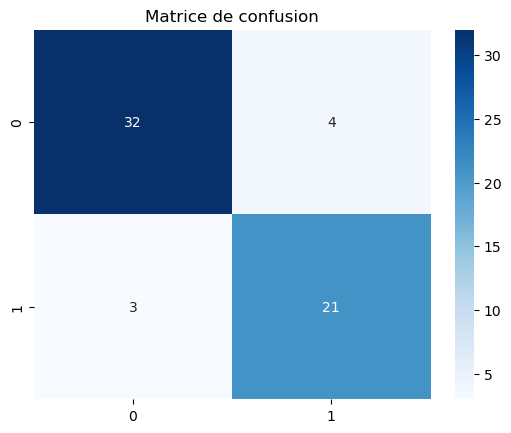

In [24]:
best = RandomForestClassifier(n_estimators=200)
best.fit(X_train, y_train)
pred = best.predict(X_test)

print(classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Matrice de confusion')
plt.show()

Le modèle se trompe très peu.

Excellent taux de vrais positifs (diagnostic correct de maladie).

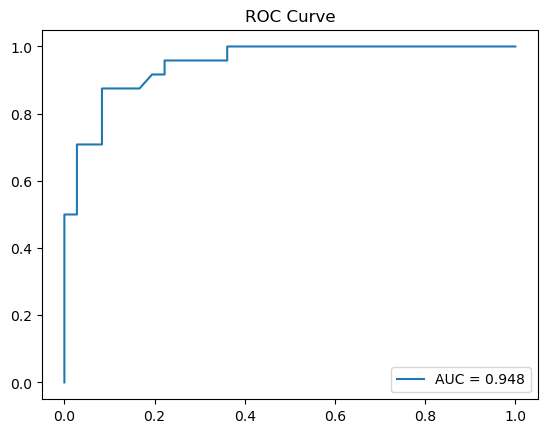

In [31]:
proba = best.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, proba)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.legend()
plt.title('ROC Curve')
plt.show()

## 9. Conclusion

Ce projet montre que les modèles de Machine Learning
peuvent aider à estimer le risque de maladie cardiaque
à partir de données cliniques.

Le Random Forest offre les meilleures performances globales,
tandis que la Régression Logistique reste intéressante
pour son interprétabilité.

Ce travail met en évidence l’importance :
- du choix des métriques en santé,
- de la validation croisée,
- et de la prudence dans l’interprétation des résultats.

 Limites :
- Dataset de taille limitée
- Données issues d’un environnement contrôlé
- Absence de données longitudinales

Ces modèles ne doivent pas être utilisés seuls pour des décisions médicales.

